Problem.2 Solution

In [2]:
#upload the required file
from google.colab import files
uploaded = files.upload()  

Saving USAFAO.csv to USAFAO.csv


In [ ]:
!ls

FAO.csv  sample_data  USAFAO.csv


In [3]:
#bring the USAFAO.csv data as a table
import pandas as pd
import numpy as np
df = pd.read_csv('USAFAO.csv')
df.head(5)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,USA,231,United States of America,2511,Wheat and products,5521,Feed,1000 tonnes,37.09,-95.71,1197,944,778,1494,3971,2735,1002,4259,5127,5253,7141,5430,3405,950,1015,2025,5239,4287,2338,1606,3669,5302,10103,11082,7735,10919,7898,4096,3786,13129,6654,5269,7395,9376,4183,8372,6818,10650,7846,8164,4953,3157,5524,4953,4354,3187,436,6260,4899,3620,4898,9943,6196
1,USA,231,United States of America,2511,Wheat and products,5142,Food,1000 tonnes,37.09,-95.71,13439,13314,13320,13525,13510,13479,13717,13840,13916,13825,13910,14011,14535,14524,15168,15918,15539,15644,16130,16151,16223,16859,16665,17260,18038,18513,19308,19635,19401,20657,20989,21680,22639,23095,25662,23749,23938,24398,24301,25393,24947,24315,24801,24511,24869,25250,25793,25302,24959,25167,25050,25757,25742
2,USA,231,United States of America,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,37.09,-95.71,481,574,518,564,620,589,611,645,695,566,655,609,619,676,700,643,716,532,885,888,1054,1163,985,867,912,1179,1460,1475,1559,1730,1851,1916,1834,2046,2236,2151,2284,2349,2056,2007,2026,2120,1827,1943,2021,2075,2104,2104,2118,2194,2127,2175,2203
3,USA,231,United States of America,2513,Barley and products,5521,Feed,1000 tonnes,37.09,-95.71,5247,5008,5073,5465,4289,4572,4463,4942,5399,6249,5835,5204,5045,3917,4058,3783,3849,4677,4391,3653,4302,5160,6052,6553,6945,6497,5511,3723,4202,4463,4899,4245,5247,4964,3898,4725,3134,3505,3005,2683,2271,1819,1617,2238,1035,1071,653,1415,1057,1089,827,1441,1440
4,USA,231,United States of America,2513,Barley and products,5142,Food,1000 tonnes,37.09,-95.71,131,131,152,152,152,152,180,174,174,152,124,122,126,131,143,148,151,162,165,165,167,167,172,174,177,172,165,158,155,147,140,151,145,148,148,152,148,159,151,151,157,159,153,158,152,162,164,169,166,167,164,160,160


In [4]:
#create a array of cereals 
cereals=['Wheat and products', 'Rice (Milled Equivalent)',
       'Barley and products', 'Maize and products', 'Rye and products',
       'Oats', 'Millet and products', 'Sorghum and products',
       'Cereals, Other'] 

In [5]:
#Remove all the data that does nor fit into our 9 categories
data_UFAO=df.loc[df['Item'].isin(cereals)]
data_UFAO.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,USA,231,United States of America,2511,Wheat and products,5521,Feed,1000 tonnes,37.09,-95.71,1197,944,778,1494,3971,2735,1002,4259,5127,5253,7141,5430,3405,950,1015,2025,5239,4287,2338,1606,3669,5302,10103,11082,7735,10919,7898,4096,3786,13129,6654,5269,7395,9376,4183,8372,6818,10650,7846,8164,4953,3157,5524,4953,4354,3187,436,6260,4899,3620,4898,9943,6196
1,USA,231,United States of America,2511,Wheat and products,5142,Food,1000 tonnes,37.09,-95.71,13439,13314,13320,13525,13510,13479,13717,13840,13916,13825,13910,14011,14535,14524,15168,15918,15539,15644,16130,16151,16223,16859,16665,17260,18038,18513,19308,19635,19401,20657,20989,21680,22639,23095,25662,23749,23938,24398,24301,25393,24947,24315,24801,24511,24869,25250,25793,25302,24959,25167,25050,25757,25742
2,USA,231,United States of America,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,37.09,-95.71,481,574,518,564,620,589,611,645,695,566,655,609,619,676,700,643,716,532,885,888,1054,1163,985,867,912,1179,1460,1475,1559,1730,1851,1916,1834,2046,2236,2151,2284,2349,2056,2007,2026,2120,1827,1943,2021,2075,2104,2104,2118,2194,2127,2175,2203
3,USA,231,United States of America,2513,Barley and products,5521,Feed,1000 tonnes,37.09,-95.71,5247,5008,5073,5465,4289,4572,4463,4942,5399,6249,5835,5204,5045,3917,4058,3783,3849,4677,4391,3653,4302,5160,6052,6553,6945,6497,5511,3723,4202,4463,4899,4245,5247,4964,3898,4725,3134,3505,3005,2683,2271,1819,1617,2238,1035,1071,653,1415,1057,1089,827,1441,1440
4,USA,231,United States of America,2513,Barley and products,5142,Food,1000 tonnes,37.09,-95.71,131,131,152,152,152,152,180,174,174,152,124,122,126,131,143,148,151,162,165,165,167,167,172,174,177,172,165,158,155,147,140,151,145,148,148,152,148,159,151,151,157,159,153,158,152,162,164,169,166,167,164,160,160


In [6]:
data1=data_UFAO
year_20=['Y1994',	'Y1995',	'Y1996',	'Y1997',	'Y1998',	'Y1999',	'Y2000',	'Y2001',	'Y2002',	'Y2003',	'Y2004',	'Y2005',	'Y2006',	'Y2007',	'Y2008',	'Y2009',	'Y2010',	'Y2011',	'Y2012',	'Y2013']
data1["sum"] = data_UFAO[year_20].sum(axis=1)
data1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,sum
0,USA,231,United States of America,2511,Wheat and products,5521,Feed,1000 tonnes,37.09,-95.71,1197,944,778,1494,3971,2735,1002,4259,5127,5253,7141,5430,3405,950,1015,2025,5239,4287,2338,1606,3669,5302,10103,11082,7735,10919,7898,4096,3786,13129,6654,5269,7395,9376,4183,8372,6818,10650,7846,8164,4953,3157,5524,4953,4354,3187,436,6260,4899,3620,4898,9943,6196,117789
1,USA,231,United States of America,2511,Wheat and products,5142,Food,1000 tonnes,37.09,-95.71,13439,13314,13320,13525,13510,13479,13717,13840,13916,13825,13910,14011,14535,14524,15168,15918,15539,15644,16130,16151,16223,16859,16665,17260,18038,18513,19308,19635,19401,20657,20989,21680,22639,23095,25662,23749,23938,24398,24301,25393,24947,24315,24801,24511,24869,25250,25793,25302,24959,25167,25050,25757,25742,496999
2,USA,231,United States of America,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,37.09,-95.71,481,574,518,564,620,589,611,645,695,566,655,609,619,676,700,643,716,532,885,888,1054,1163,985,867,912,1179,1460,1475,1559,1730,1851,1916,1834,2046,2236,2151,2284,2349,2056,2007,2026,2120,1827,1943,2021,2075,2104,2104,2118,2194,2127,2175,2203,42166
3,USA,231,United States of America,2513,Barley and products,5521,Feed,1000 tonnes,37.09,-95.71,5247,5008,5073,5465,4289,4572,4463,4942,5399,6249,5835,5204,5045,3917,4058,3783,3849,4677,4391,3653,4302,5160,6052,6553,6945,6497,5511,3723,4202,4463,4899,4245,5247,4964,3898,4725,3134,3505,3005,2683,2271,1819,1617,2238,1035,1071,653,1415,1057,1089,827,1441,1440,43887
4,USA,231,United States of America,2513,Barley and products,5142,Food,1000 tonnes,37.09,-95.71,131,131,152,152,152,152,180,174,174,152,124,122,126,131,143,148,151,162,165,165,167,167,172,174,177,172,165,158,155,147,140,151,145,148,148,152,148,159,151,151,157,159,153,158,152,162,164,169,166,167,164,160,160,3148
5,USA,231,United States of America,2514,Maize and products,5521,Feed,1000 tonnes,37.09,-95.71,81588,80191,76406,75085,85373,84662,89488,91621,97133,91240,101528,109326,106252,81055,90984,91492,94738,108574,115905,107496,107811,116160,98457,104509,104501,118350,121647,99921,111315,117066,121867,133403,118868,138675,119189,134037,138442,138491,143326,147880,148558,140927,146844,155831,155323,140719,148787,131619,130193,121902,115739,109607,128024,2734113
6,USA,231,United States of America,2514,Maize and products,5142,Food,1000 tonnes,37.09,-95.71,1470,1499,1526,1570,1628,1714,1694,1489,1480,1404,1334,1262,1290,1356,1443,1486,1657,1707,1784,1812,1892,1977,2136,2344,2542,2891,3249,3272,3321,3363,3454,3461,3525,3597,3661,3725,3796,3830,3837,3842,3858,3871,3879,3879,3887,3887,3887,3887,3913,3954,3969,3935,3917,77011
7,USA,231,United States of America,2515,Rye and products,5521,Feed,1000 tonnes,37.09,-95.71,287,180,170,267,249,251,177,233,242,290,415,442,204,178,193,135,178,203,175,168,206,244,302,366,277,348,269,290,231,196,191,155,178,175,152,124,135,104,146,59,75,85,61,107,96,100,99,56,37,93,71,148,184,2107
8,USA,231,United States of America,2515,Rye and products,5142,Food,1000 tonnes,37.09,-95.71,112,119,119,122,116,122,125,135,117,128,126,113,103,94,76,69,60,52,45,29,38,23,50,45,52,46,40,39,89,89,85,85,88,84,83,87,78,89,83,82,83,83,83,83,84,84,85,84,83,81,85,86,87,1677
9,USA,231,United States of America,2516,Oats,5521,Feed,1000 tonnes,37.09,-95.71,13339,12744,11830,11322,10915,10872,9957,10683,10669,11307,10770,10480,9777,8493,8157,7082,7472,7693,7189,6343,6648,6421,6880,6323,6738,5580,5199,2813,3846,4151,3411,3382,2801,3396,2830,2497,2685,2845,2613,3034,2148,2177,2086,1977,1969,1814,1744,1568,1666,1481,1264,1389,1430,42613


In [7]:
#Add all the iteam (combing Food and Feed for each item)
data2=data1[[	'Item',	'sum']]
data_comb=data2.groupby(['Item']).sum()
#data_comb

In [8]:
#average over 20 years
data_comb['sum']=data_comb[['sum']]/20
#data_comb

In [9]:
c1=['Area Abbreviation',
 'Area Code',
 'Area',
 'Item Code',
 'Item',
 'Unit',
 'latitude',
 'longitude']
data3=data_UFAO[c1]
 

In [10]:
data4=data3.drop_duplicates()
data4.head(2)


,Area Abbreviation,Area Code,Area,Item Code,Item,Unit,latitude,longitude
0,USA,231,United States of America,2511,Wheat and products,1000 tonnes,37.09,-95.71
2,USA,231,United States of America,2805,Rice (Milled Equivalent),1000 tonnes,37.09,-95.71


In [11]:
#The average cereal data of 20 years 
data_UFAO_sum=pd.merge(data4,data_comb,left_on=['Item'],right_on=['Item'])
data_UFAO_sum.head(10)

,Area Abbreviation,Area Code,Area,Item Code,Item,Unit,latitude,longitude,sum
0,USA,231,United States of America,2511,Wheat and products,1000 tonnes,37.09,-95.71,30739.40
1,USA,231,United States of America,2805,Rice (Milled Equivalent),1000 tonnes,37.09,-95.71,2108.30
2,USA,231,United States of America,2513,Barley and products,1000 tonnes,37.09,-95.71,2351.75
3,USA,231,United States of America,2514,Maize and products,1000 tonnes,37.09,-95.71,140556.20
4,USA,231,United States of America,2515,Rye and products,1000 tonnes,37.09,-95.71,189.20
5,USA,231,United States of America,2516,Oats,1000 tonnes,37.09,-95.71,3279.75
6,USA,231,United States of America,2517,Millet and products,1000 tonnes,37.09,-95.71,204.50
7,USA,231,United States of America,2518,Sorghum and products,1000 tonnes,37.09,-95.71,5663.05
8,USA,231,United States of America,2520,"Cereals, Other",1000 tonnes,37.09,-95.71,133.30


Problem.3 Solution

In [12]:
#bring FAO.csv as table
data_FAO = pd.read_csv('FAO.csv',  encoding = "ISO-8859-1")
pd.options.mode.chained_assignment = None
data_FAO.head(5)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,2045.0,2154.0,1819.0,1963.0,2215.0,2310.0,2335.0,2434.0,2512.0,2282.0,2454.0,2443.0,2129.0,2133.0,2068.0,1994.0,1851.0,1791.0,1683.0,2194.0,1801.0,1754.0,1640.0,1539.0,1582.0,1840.0,1855.0,1853.0,2177.0,2343.0,2407.0,2463.0,2600.0,2668.0,2776.0,3095.0,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,238.0,213.0,205.0,233.0,246.0,246.0,255.0,263.0,235.0,254.0,270.0,259.0,248.0,217.0,217.0,197.0,186.0,200.0,193.0,202.0,191.0,199.0,197.0,249.0,218.0,260.0,319.0,254.0,326.0,347.0,270.0,372.0,411.0,448.0,460.0,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,76.0,76.0,76.0,76.0,75.0,71.0,72.0,73.0,74.0,71.0,70.0,72.0,76.0,77.0,80.0,60.0,65.0,64.0,64.0,60.0,55.0,53.0,51.0,48.0,46.0,46.0,47.0,46.0,43.0,43.0,40.0,50.0,46.0,41.0,44.0,50.0,48.0,43.0,26.0,29.0,70.0,48.0,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,238.0,238.0,237.0,225.0,227.0,230.0,234.0,223.0,219.0,225.0,240.0,244.0,255.0,185.0,203.0,198.0,202.0,189.0,174.0,167.0,160.0,151.0,145.0,145.0,148.0,145.0,135.0,132.0,120.0,155.0,143.0,125.0,138.0,159.0,154.0,141.0,84.0,83.0,122.0,144.0,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,210.0,214.0,216.0,216.0,216.0,235.0,232.0,236.0,200.0,201.0,216.0,228.0,231.0,234.0,240.0,228.0,234.0,228.0,226.0,210.0,199.0,192.0,182.0,173.0,170.0,154.0,148.0,137.0,144.0,126.0,90.0,141.0,150.0,159.0,108.0,90.0,99.0,72.0,35.0,48.0,89.0,63.0,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [13]:
df_FAO=data_FAO.loc[data_FAO['Item'].isin(cereals)]

In [14]:
#Group and Merge data
dataT1=df_FAO
dataT1["sum"] = df_FAO[year_20].sum(axis=1)
dataT1


,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,sum
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,2045.0,2154.0,1819.0,1963.0,2215.0,2310.0,2335.0,2434.0,2512.0,2282.0,2454.0,2443.0,2129.0,2133.0,2068.0,1994.0,1851.0,1791.0,1683.0,2194.0,1801.0,1754.0,1640.0,1539.0,1582.0,1840.0,1855.0,1853.0,2177.0,2343.0,2407.0,2463.0,2600.0,2668.0,2776.0,3095.0,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,66651.0
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,238.0,213.0,205.0,233.0,246.0,246.0,255.0,263.0,235.0,254.0,270.0,259.0,248.0,217.0,217.0,197.0,186.0,200.0,193.0,202.0,191.0,199.0,197.0,249.0,218.0,260.0,319.0,254.0,326.0,347.0,270.0,372.0,411.0,448.0,460.0,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422,8002.0
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,76.0,76.0,76.0,76.0,75.0,71.0,72.0,73.0,74.0,71.0,70.0,72.0,76.0,77.0,80.0,60.0,65.0,64.0,64.0,60.0,55.0,53.0,51.0,48.0,46.0,46.0,47.0,46.0,43.0,43.0,40.0,50.0,46.0,41.0,44.0,50.0,48.0,43.0,26.0,29.0,70.0,48.0,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360,3118.0
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,238.0,238.0,237.0,225.0,227.0,230.0,234.0,223.0,219.0,225.0,240.0,244.0,255.0,185.0,203.0,198.0,202.0,189.0,174.0,167.0,160.0,151.0,145.0,145.0,148.0,145.0,135.0,132.0,120.0,155.0,143.0,125.0,138.0,159.0,154.0,141.0,84.0,83.0,122.0,144.0,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89,2029.0
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,210.0,214.0,216.0,216.0,216.0,235.0,232.0,236.0,200.0,201.0,216.0,228.0,231.0,234.0,240.0,228.0,234.0,228.0,226.0,210.0,199.0,192.0,182.0,173.0,170.0,154.0,148.0,137.0,144.0,126.0,90.0,141.0,150.0,159.0,108.0,90.0,99.0,72.0,35.0,48.0,89.0,63.0,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200,2934.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21365,ZWE,181,Zimbabwe,2517,Millet and products,5142,Food,1000 tonnes,-19.02,29.15,145.0,206.0,196.0,201.0,209.0,158.0,132.0,131.0,157.0,164.0,132.0,124.0,157.0,141.0,141.0,143.0,149.0,149.0,128.0,141.0,108.0,76.0,78.0,94.0,92.0,93.0,97.0,88.0,86.0,94.0,95.0,84.0,72.0,74.0,78.0,83.0,81.0,54.0,50.0,49.0,49.0,47.0,39.0,36.0,37.0,40.0,42.0,27.0,29.0,38.0,41.0,37,41,972.0
21366,ZWE,181,Zimbabwe,2518,Sorghum and products,5521,Feed,1000 tonnes,-19.02,29.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1,38.0
21367,ZWE,181,Zimbabwe,2518,Sorghum and products,5142,Food,1000 tonnes,-19.02,29.15,41.0,42.0,35.0,36.0,33.0,68.0,72.0,79.0,60.0,82.0,84.0,84.0,36.0,119.0,84.0,93.0,33.0,48.0,31.0,52.0,80.0,37.0,31.0,39.0,44.0,54.0,56.0,57.0,66.0,69.0,44.0,49.0,54.0,54.0,36.0,54.0,54.0,76.0,52.0,54.0,53.0,57.0,49.0,85.0,81.0,91.0,89.0,91.0,90.0,86.0,89.0,57,57,1355.0
21368,ZWE,181,Zimbabwe,2520,"Cereals, Other",5521,Feed,1000 tonnes,-19.02,29.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,0.0,0.0,0,0,16.0


In [15]:
#Add all the iteam (combing Food and Feed for each item)
dataT2=dataT1[['Area', 'Area Code','Item','sum']]
data_Tcomb=dataT2.groupby(['Area', 'Area Code','Item'])['sum'].agg('sum').reset_index()
data_Tcomb

,Area,Area Code,Item,sum
0,Afghanistan,2,Barley and products,5147.0
1,Afghanistan,2,"Cereals, Other",5.0
2,Afghanistan,2,Maize and products,5589.0
3,Afghanistan,2,Millet and products,349.0
4,Afghanistan,2,Rice (Milled Equivalent),8002.0
...,...,...,...,...
1468,Zimbabwe,181,Oats,18.0
1469,Zimbabwe,181,Rice (Milled Equivalent),873.0
1470,Zimbabwe,181,Rye and products,0.0
1471,Zimbabwe,181,Sorghum and products,1393.0


In [16]:
#average over 20 years
data_Tcomb['sum']=data_Tcomb[['sum']]/20
data_Tcomb

,Area,Area Code,Item,sum
0,Afghanistan,2,Barley and products,257.35
1,Afghanistan,2,"Cereals, Other",0.25
2,Afghanistan,2,Maize and products,279.45
3,Afghanistan,2,Millet and products,17.45
4,Afghanistan,2,Rice (Milled Equivalent),400.10
...,...,...,...,...
1468,Zimbabwe,181,Oats,0.90
1469,Zimbabwe,181,Rice (Milled Equivalent),43.65
1470,Zimbabwe,181,Rye and products,0.00
1471,Zimbabwe,181,Sorghum and products,69.65


In [17]:
c2=['Area Abbreviation',
 'Area Code',
 'Area',
 'Item Code',
 'Item',
 'Unit',
 'latitude',
 'longitude']
dataT3=df_FAO[c2]

In [18]:
#Drop the duplicates
dataT4=dataT3.drop_duplicates()
dataT4.head(2)

,Area Abbreviation,Area Code,Area,Item Code,Item,Unit,latitude,longitude
0,AFG,2,Afghanistan,2511,Wheat and products,1000 tonnes,33.94,67.71
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),1000 tonnes,33.94,67.71


In [19]:
#The average cereal data of 20 years 
data_FAO_sum=pd.merge(dataT4,data_Tcomb,left_on=['Item','Area','Area Code'],right_on=['Item','Area','Area Code'])
data_FAO_sum

,Area Abbreviation,Area Code,Area,Item Code,Item,Unit,latitude,longitude,sum
0,AFG,2,Afghanistan,2511,Wheat and products,1000 tonnes,33.94,67.71,3332.55
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),1000 tonnes,33.94,67.71,400.10
2,AFG,2,Afghanistan,2513,Barley and products,1000 tonnes,33.94,67.71,257.35
3,AFG,2,Afghanistan,2514,Maize and products,1000 tonnes,33.94,67.71,279.45
4,AFG,2,Afghanistan,2517,Millet and products,1000 tonnes,33.94,67.71,17.45
...,...,...,...,...,...,...,...,...,...
1468,ZWE,181,Zimbabwe,2515,Rye and products,1000 tonnes,-19.02,29.15,0.00
1469,ZWE,181,Zimbabwe,2516,Oats,1000 tonnes,-19.02,29.15,0.90
1470,ZWE,181,Zimbabwe,2517,Millet and products,1000 tonnes,-19.02,29.15,48.60
1471,ZWE,181,Zimbabwe,2518,Sorghum and products,1000 tonnes,-19.02,29.15,69.65


Problem.4 Solution

([<matplotlib.axis.XTick at 0x7f99c03b4160>],
 <a list of 1 Text major ticklabel objects>)

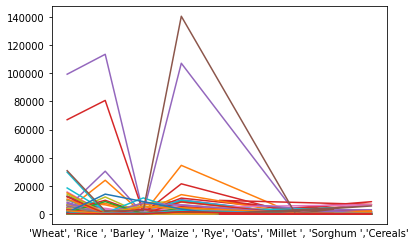

In [20]:
#Visualize the data 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
area_list = list(data_FAO_sum['Area'].unique())
Item=list(data_FAO_sum['Item'])
for i in area_list:
       plt.plot('Item','sum',data=data_FAO_sum[(data_FAO_sum['Area'] == i)])
plt.xlabel("'Wheat', 'Rice ', 'Barley ', 'Maize ', 'Rye', 'Oats', 'Millet ', 'Sorghum ','Cereals'")
plt.xticks("")

In [21]:
#rearrange the data
#In this dataset 
data_group=data_FAO_sum
c=['country','Wheat and products',
 'Rice (Milled Equivalent)',
 'Barley and products',
 'Maize and products',
 'Rye and products',
 'Oats',
 'Millet and products',
 'Sorghum and products',
 'Cereals, Other']
wt=[]
Rice=[]
Bar=[]
Maz=[]
Rye=[]
Oat=[]
Mil=[]
Sor=[]
Oth=[]
Df_FAO = pd.DataFrame(columns = c)
country=[]
for i in area_list:
  country.append(i) 
  t1=data_group[(data_group['Area'] == i)&(data_group['Item']==cereals[0])]
  if(len(t1)==0):
    wt.append(0)
  else:
    wt.append(int(t1['sum']))
  t2=data_group[(data_group['Area'] == i)&(data_group['Item']==cereals[1])]
  if(len(t2)==0):
    Rice.append(0)
  else:
    Rice.append(int(t2['sum']))
  t3=data_group[(data_group['Area'] == i)&(data_group['Item']==cereals[2])]
  if(len(t3)==0):
    Bar.append(0)
  else:
    Bar.append(int(t3['sum']))
  t4=data_group[(data_group['Area'] == i)&(data_group['Item']==cereals[3])]
  if(len(t4)==0):
    Maz.append(0)
  else:
    Maz.append(int(t4['sum']))
  t5=data_group[(data_group['Area'] == i)&(data_group['Item']==cereals[4])]
  if(len(t5)==0):
    Rye.append(0)
  else:
    Rye.append(int(t5['sum']))
  t6=data_group[(data_group['Area'] == i)&(data_group['Item']==cereals[5])]
  if(len(t6)==0):
    Oat.append(0)
  else:
    Oat.append(int(t6['sum']))
  t7=data_group[(data_group['Area'] == i)&(data_group['Item']==cereals[6])]
  if(len(t7)==0):
    Mil.append(0)
  else:
    Mil.append(int(t7['sum']))
  t8=data_group[(data_group['Area'] == i)&(data_group['Item']==cereals[7])]
  if(len(t8)==0):
    Sor.append(0)
  else:
    Sor.append(int(t8['sum']))
  t9=data_group[(data_group['Area'] == i)&(data_group['Item']==cereals[8])]
  if(len(t9)==0):
    Oth.append(0)
  else:
    Oth.append(int(t9['sum']))
  
  

       

In [22]:
#Add data into the new dataset
Df_FAO['country']=country
Df_FAO['Wheat and products']=wt
Df_FAO['Rice (Milled Equivalent)']=Rice
Df_FAO['Barley and products']=Bar
Df_FAO['Maize and products']=Maz
Df_FAO['Rye and products']=Rye
Df_FAO['Oats']=Oat
Df_FAO['Millet and products']=Mil
Df_FAO['Sorghum and products']=Sor
Df_FAO['Cereals, Other']=Oth

In [23]:
#See the new dataset where We can observe Cereals per Country
Df_FAO

,country,Wheat and products,Rice (Milled Equivalent),Barley and products,Maize and products,Rye and products,Oats,Millet and products,Sorghum and products,"Cereals, Other"
0,Afghanistan,3332,400,257,279,0,0,17,0,0
1,Albania,526,38,5,252,2,16,0,0,0
2,Algeria,6431,68,1065,1739,2,58,0,2,4
3,Angola,488,98,0,674,0,0,66,26,0
4,Antigua and Barbuda,4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
169,Venezuela (Bolivarian Republic of),1282,586,4,2432,1,40,0,370,17
170,Viet Nam,1026,14076,0,3443,0,0,1,0,1
171,Yemen,2225,262,32,298,0,0,70,356,2
172,Zambia,141,26,0,1434,0,0,19,19,0


Text(0.5, 0, "'Wheat', 'Rice ', 'Barley ', 'Maize ', 'Rye', 'Oats', 'Millet ', 'Sorghum ','Cereals'")

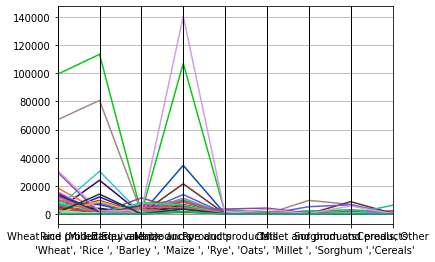

In [24]:
#parallel plotting 
from matplotlib import pyplot as plt
pd.plotting.parallel_coordinates(Df_FAO, "country")
plt.legend().set_visible(False)
plt.xlabel("'Wheat', 'Rice ', 'Barley ', 'Maize ', 'Rye', 'Oats', 'Millet ', 'Sorghum ','Cereals'")
#plt.xticks("")


In [25]:
#normalize the data
#normalize the data mean=0, std=1 over countries
import pandas as pd
from sklearn import preprocessing
x=Df_FAO[cereals]
#normalized over the column (over wheat, Rice....etc for all country)
x_scaled = preprocessing.scale(x)
CerealNorm =  pd.DataFrame(x_scaled)
CerealNorm

,0,1,2,3,4,5,6,7,8
0,0.031055,-0.154504,-0.202917,-0.203190,-0.208304,-0.276496,-0.149090,-0.259207,-0.222188
1,-0.253268,-0.187586,-0.365711,-0.205165,-0.203468,-0.241067,-0.168998,-0.259207,-0.222188
2,0.345067,-0.184845,0.319057,-0.096428,-0.203468,-0.148066,-0.168998,-0.257376,-0.214817
3,-0.257119,-0.182103,-0.368941,-0.174306,-0.208304,-0.276496,-0.091707,-0.235392,-0.222188
4,-0.306161,-0.190967,-0.368941,-0.223592,-0.208304,-0.276496,-0.168998,-0.259207,-0.222188
...,...,...,...,...,...,...,...,...,...
169,-0.176665,-0.137506,-0.366357,-0.045753,-0.205886,-0.187923,-0.168998,0.079699,-0.190861
170,-0.202605,1.095309,-0.368941,0.028177,-0.208304,-0.276496,-0.167827,-0.259207,-0.220345
171,-0.081114,-0.167115,-0.348269,-0.201801,-0.208304,-0.276496,-0.087023,0.066876,-0.218502
172,-0.292279,-0.188683,-0.368941,-0.118731,-0.208304,-0.276496,-0.146748,-0.241804,-0.222188


In [26]:
#Use Principal Component Analysis for Scatter Plot 
from sklearn.decomposition import PCA
pca = PCA(svd_solver='full')
pca.fit(CerealNorm)
X = pca.transform(CerealNorm)
p=pca.explained_variance_ratio_
Src = pd.DataFrame(data=X)
#tempdata = [['pos']].join(Src)
print(Src)

            0         1         2  ...         6         7         8
0   -0.509351  0.133229 -0.012114  ...  0.005441 -0.112059  0.180091
1   -0.690021  0.113695  0.005473  ...  0.003583 -0.014231  0.039012
2   -0.145840 -0.069678  0.151329  ... -0.063760 -0.216832  0.278569
3   -0.664942  0.170209 -0.020770  ... -0.028828 -0.047481  0.006126
4   -0.737220  0.115634 -0.015914  ...  0.009527 -0.010901  0.003660
..        ...       ...       ...  ...       ...       ...       ...
169 -0.448435  0.245223  0.121150  ...  0.112134 -0.003977  0.053485
170 -0.145174  0.624049 -0.144444  ...  0.300403  0.510347 -0.512967
171 -0.486281  0.287633 -0.015740  ...  0.126420 -0.059405  0.154337
172 -0.680709  0.147997  0.033951  ... -0.023548 -0.052239 -0.029754
173 -0.643132  0.175711  0.026337  ... -0.022930 -0.059825 -0.023934

[174 rows x 9 columns]


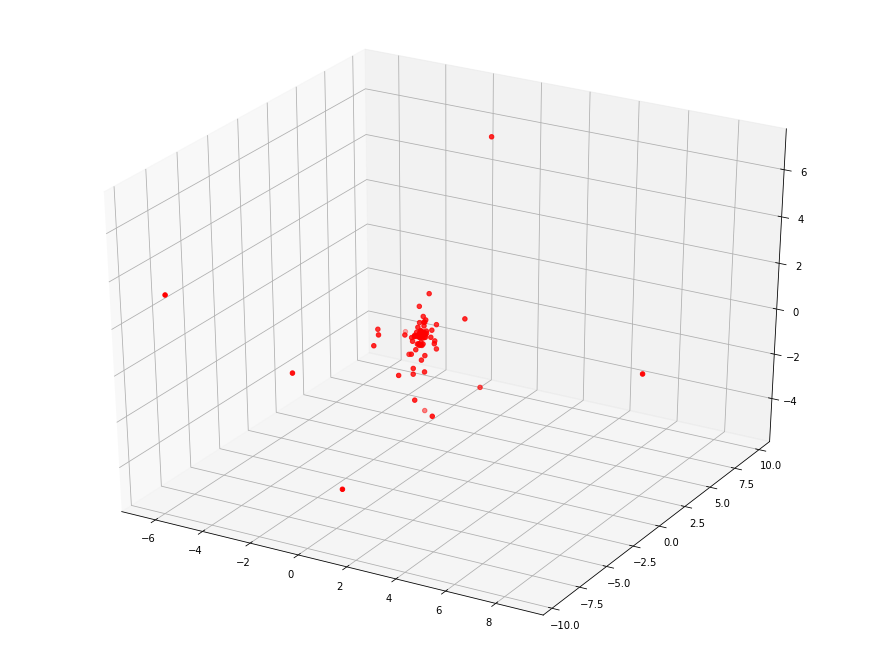

In [27]:
#Scatterplot the PCA of cerealNorm
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)
y = Src.iloc[:,1]
x = Src.iloc[:,2]
z = Src.iloc[:,3]
ax.scatter(x,y,z,color='red')

In [28]:
DFC=Df_FAO.loc[:,cereals]

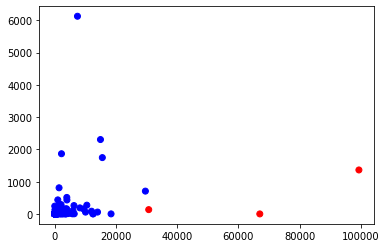

In [29]:
#k mean clustering when k=2
#Implementation of K-Means Clustering
sse = []
Xk=Df_FAO[cereals].values
model = KMeans(n_clusters = 2)
model.fit(DFC)                 #Use CerealNorm for normalized data
model.labels_
colormap = np.array(['Red', 'Blue'])
plt.scatter(Xk[:, 0], Xk[:, 8], c = colormap[model.labels_])

In [30]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [31]:
Df_FAO['Yield']= model.labels_

In [32]:
Df_FAO

,country,Wheat and products,Rice (Milled Equivalent),Barley and products,Maize and products,Rye and products,Oats,Millet and products,Sorghum and products,"Cereals, Other",Yield
0,Afghanistan,3332,400,257,279,0,0,17,0,0,1
1,Albania,526,38,5,252,2,16,0,0,0,1
2,Algeria,6431,68,1065,1739,2,58,0,2,4,1
3,Angola,488,98,0,674,0,0,66,26,0,1
4,Antigua and Barbuda,4,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
169,Venezuela (Bolivarian Republic of),1282,586,4,2432,1,40,0,370,17,1
170,Viet Nam,1026,14076,0,3443,0,0,1,0,1,1
171,Yemen,2225,262,32,298,0,0,70,356,2,1
172,Zambia,141,26,0,1434,0,0,19,19,0,1


In [33]:
High_Yield=Df_FAO[Df_FAO.Yield==0]
High_Yield

,country,Wheat and products,Rice (Milled Equivalent),Barley and products,Maize and products,Rye and products,Oats,Millet and products,Sorghum and products,"Cereals, Other",Yield
34,"China, mainland",99340,113501,696,107132,779,716,1982,2925,1363,0
73,India,66993,80696,1182,11233,0,12,9638,6756,0,0
165,United States of America,30739,2108,2351,140556,189,3279,204,5663,133,0


In [34]:
#Plot the Parallel Co-ordinate of the cluster

Problem.5 Solution

In [35]:
test=Df_FAO[Df_FAO.Yield==0]
test    #So we have to eliminate this outliers who contain high percentage of data

,country,Wheat and products,Rice (Milled Equivalent),Barley and products,Maize and products,Rye and products,Oats,Millet and products,Sorghum and products,"Cereals, Other",Yield
34,"China, mainland",99340,113501,696,107132,779,716,1982,2925,1363,0
73,India,66993,80696,1182,11233,0,12,9638,6756,0,0
165,United States of America,30739,2108,2351,140556,189,3279,204,5663,133,0


In [ ]:
Df_FAO_t =Df_FAO[Df_FAO.Yield!= 0]
Df_FAO_t

In [ ]:
#drop the Yield Column as we are going to do the same
Df_FAO_t=Df_FAO_t.drop(columns=['Yield'])
Df_FAO_t

In [38]:
#normalize the data
#normalize the data mean=0, std=1 over countries
import pandas as pd
from sklearn import preprocessing
x1=Df_FAO_t[cereals]
#normalized over the column (over wheat, Rice....etc for all country)
x_scaled = preprocessing.scale(x1)
CerealNorm_revise =  pd.DataFrame(x_scaled)

In [39]:
#Use Principal Component Analysis for Scatter Plot 
from sklearn.decomposition import PCA
pca = PCA(svd_solver='full')
pca.fit(CerealNorm_revise)
X1 = pca.transform(CerealNorm_revise)
p=pca.explained_variance_ratio_
Src1 = pd.DataFrame(data=X1)
#tempdata = [['pos']].join(Src)
print(Src1)

            0         1         2  ...         6         7         8
0   -0.306108 -0.312109 -0.041650  ... -0.193212 -0.341259 -0.020134
1   -0.684407 -0.407678  0.157507  ...  0.050514 -0.088702  0.004012
2    0.431189 -0.160993 -0.330198  ... -0.324685 -0.339829 -0.040717
3   -0.682977 -0.253618  0.192826  ...  0.126556 -0.034435  0.029164
4   -0.779935 -0.450039  0.215370  ...  0.036199 -0.030807  0.033645
..        ...       ...       ...  ...       ...       ...       ...
166 -0.421587  0.208363 -0.075514  ...  0.082171 -0.138862  0.000011
167 -0.431526  1.198457 -2.698681  ... -0.222335  0.130507 -0.008039
168 -0.463951 -0.014518  0.227488  ... -0.230035 -0.355475 -0.000861
169 -0.691450 -0.217903  0.084332  ...  0.226659  0.044313  0.057338
170 -0.656068 -0.131407  0.113562  ...  0.221492  0.031864  0.054994

[171 rows x 9 columns]


No handles with labels found to put in legend.


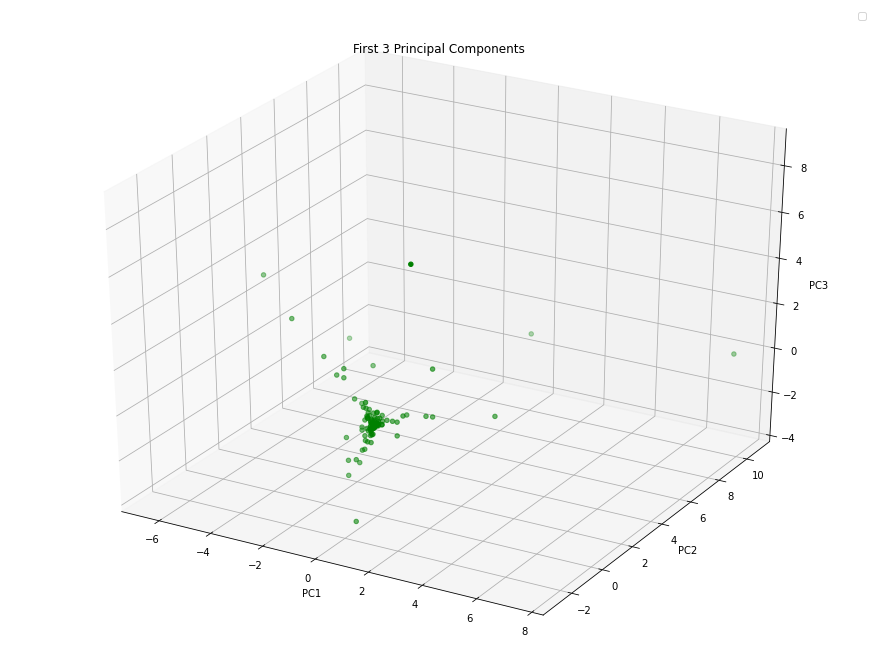

In [40]:
#Scatterplot the PCA of cerealNorm
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)
y1 = Src1.iloc[:,1]
x1 = Src1.iloc[:,2]
z1 = Src1.iloc[:,3]
ax.scatter(x1,y1,z1,color='green')
plt.title('First 3 Principal Components')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_zlabel('PC3')
plt.legend()

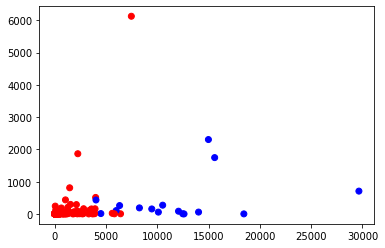

In [41]:
#k mean clustering when k=2
#Implementation of K-Means Clustering for new data
sse = []
Xk1=Df_FAO_t[cereals].values
#Xk1=CerealNorm_revise
model1 = KMeans(n_clusters = 2)
model1.fit(Xk1)
model1.labels_
colormap = np.array(['Red', 'Blue'])
plt.scatter(Xk1[:, 0], Xk1[:, 8], c = colormap[model1.labels_])

In [42]:
#Take Normal Yield and Low Yield as labels
Df_FAO_t["Yield"]=model1.labels_
Df_FAO_t

,country,Wheat and products,Rice (Milled Equivalent),Barley and products,Maize and products,Rye and products,Oats,Millet and products,Sorghum and products,"Cereals, Other",Yield
0,Afghanistan,3332,400,257,279,0,0,17,0,0,0
1,Albania,526,38,5,252,2,16,0,0,0,0
2,Algeria,6431,68,1065,1739,2,58,0,2,4,0
3,Angola,488,98,0,674,0,0,66,26,0,0
4,Antigua and Barbuda,4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
169,Venezuela (Bolivarian Republic of),1282,586,4,2432,1,40,0,370,17,0
170,Viet Nam,1026,14076,0,3443,0,0,1,0,1,0
171,Yemen,2225,262,32,298,0,0,70,356,2,0
172,Zambia,141,26,0,1434,0,0,19,19,0,0


In [43]:
Normal_Yield=Df_FAO_t[Df_FAO_t.Yield==1]   #label=1 normal Yield, label=0 low Yield
Normal_Yield

,country,Wheat and products,Rice (Milled Equivalent),Barley and products,Maize and products,Rye and products,Oats,Millet and products,Sorghum and products,"Cereals, Other",Yield
21,Brazil,9474,6466,163,34528,4,289,4,1210,154,1
28,Canada,6340,260,7862,8976,115,1693,5,1,259,1
50,Egypt,12493,2938,114,9620,2,0,0,758,4,1
56,France,15601,382,3598,6341,138,469,8,189,1746,1
61,Germany,14992,229,7078,4051,2528,1065,17,28,2306,1
74,Indonesia,4513,30377,1,10109,0,3,8,3,11,1
75,Iran (Islamic Republic of),12617,2501,3176,3654,0,0,8,0,0,1
79,Italy,10116,358,1664,9702,28,342,10,333,56,1
81,Japan,6008,7445,1338,13727,251,78,13,1861,103,1
103,Mexico,4039,579,318,21412,0,217,4,8711,432,1


In [44]:
#split the data into features and target
Y=Df_FAO_t.iloc[:,[-1]]  
X=Df_FAO_t.drop(Y.columns,axis = 1)
Y

,Yield
0,0
1,0
2,0
3,0
4,0
...,...
169,0
170,0
171,0
172,0


In [45]:
#Partition the dataset into training and Testing 
#While holding 30% data for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)



In [46]:
X_test.shape

(52, 10)

Problem.6 Solution

In [47]:
#Decision tree
from sklearn import tree
X_train1=X_train.iloc[:, 1:10]
X_test1=X_test.iloc[:, 1:10]
model = tree.DecisionTreeClassifier()
model = model.fit(X_train1, y_train)


In [ ]:
y_train

In [49]:
def error_calc(xtrain,ytrain,xtest,ytest):
    y_pred_train=prune.predict(xtrain)
    in_sample_error=1-accuracy_score(ytrain,y_pred_train)
#out sample error
    y_pred=prune.predict(xtest)
    out_sample_error=1-accuracy_score(ytest,y_pred)
    return out_sample_error*100,in_sample_error*100


In [50]:
#pruning over 7 level 
from sklearn.metrics import accuracy_score
level=7
error_final_in=np.zeros(level-1)
error_final_out=np.zeros(level-1)
for i in range(1,level):
  prune = tree.DecisionTreeClassifier(max_depth=i,random_state=42)
  prune = prune.fit(X_train1, y_train)
  error1,error2=error_calc(X_train1,y_train,X_test1,y_test)
  error_final_out[i-1]=error1
  error_final_in[i-1]=error2

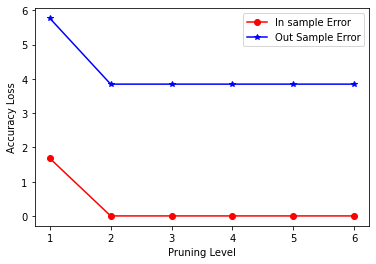

In [51]:
#plot error Vs. level
import matplotlib.pyplot as plt
plt.plot(np.arange(1,level),error_final_in,'red',marker='o',linewidth=1.5,label="In sample Error")
plt.plot(np.arange(1,level),error_final_out,'blue',marker='*',linewidth=1.5,label="Out Sample Error")
plt.xlabel("Pruning Level")
plt.ylabel("Accuracy Loss")
plt.legend()

[Text(133.92000000000002, 181.2, 'X[0] <= 4259.0\ngini = 0.168\nsamples = 119\nvalue = [108, 11]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 106\nvalue = [106, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 220.0\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]')]

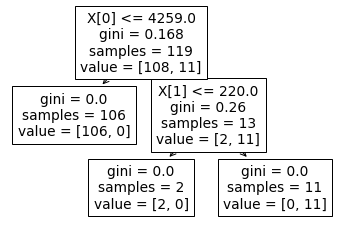

In [79]:
mdtree = tree.DecisionTreeClassifier(max_depth=2,random_state=42)   #visualize the decision tree for lowest error 
mdtree = mdtree.fit(X_train1, y_train)
tree.plot_tree(mdtree)

In [80]:
import graphviz 
dot_data = tree.export_graphviz(mdtree, out_file=None) 
graph = graphviz.Source(dot_data) 

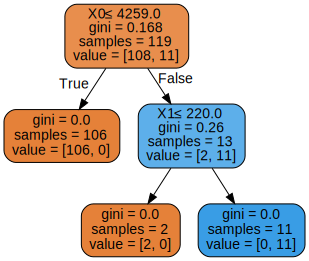

In [81]:
dot_data = tree.export_graphviz(mdtree, out_file=None,   
                  filled=True, rounded=True,  
                  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

k-nearest neighbor.

In [55]:
# KNN 
#k-neartest neighboring problem 
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
n=10 #number of K
knn_error_out=np.zeros(n-1)
knn_error_in=np.zeros(n-1)
for k in range(1,n):
  KNN_model = KNeighborsClassifier(n_neighbors=k)
  KNN_model.fit(X_train1, y_train)
  pred_out = KNN_model.predict(X_test1)
  pred_in=KNN_model.predict(X_train1)
  eout=1-accuracy_score(y_test,pred_out)
  ein=1-accuracy_score(y_train,pred_in)
  knn_error_out[k-1]=eout*100
  knn_error_in[k-1]=ein*100

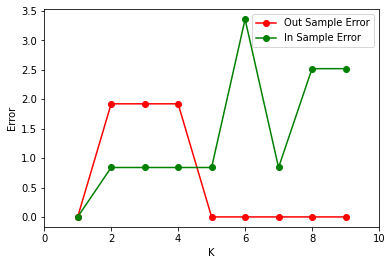

In [57]:
#plot error Vs. K
import matplotlib.pyplot as plt
plt.plot(np.arange(1,n),knn_error_out,'r',marker='o',linewidth=1.5,label='Out Sample Error')
plt.plot(np.arange(1,n),knn_error_in,'g',marker='o',linewidth=1.5,label='In Sample Error')
plt.xlim([0,n])
plt.xlabel("K")
plt.ylabel("Error")
plt.legend()

In [58]:
print("the minimum out sample error is:",np.min(knn_error_out))
num_K=np.argmin(knn_error_out)
print("at the K of:",num_K+1)

the minimum out sample error is: 0.0
at the K of: 1


In [59]:
print("the minimum in sample error is:",np.min(knn_error_in))
num_K1=np.argmin(knn_error_in)
print("at the K of:",num_K1+1)

the minimum in sample error is: 0.0
at the K of: 1


naive Bayes

In [60]:
#train the data using multinomial Naive Bias
import numpy as np
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()
mn.fit(X_train1,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [61]:
#classification loss (out Sample)
from sklearn.metrics import accuracy_score
y_pred_mn=mn.predict(X_test1)
errRateNB1=1-accuracy_score(y_test,y_pred_mn)
print(errRateNB1*100)

38.46153846153846


In [62]:
#classification loss (in Sample)
from sklearn.metrics import accuracy_score
y_pred_mn_in=mn.predict(X_train1)
errRateNB1_in=1-accuracy_score(y_train,y_pred_mn_in)
print(errRateNB1_in*100)

42.85714285714286


In [63]:
#Gaussian Naive bias where distribution is assumed to be normal
from sklearn.naive_bayes import GaussianNB
normal = GaussianNB()
normal.fit(X_train1,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
#Classification loss (out Sample)
y_pred_normal=normal.predict(X_test1)
errRateNB2=1-accuracy_score(y_test,y_pred_normal)
print(errRateNB2*100)

5.769230769230771


In [65]:
#Classification loss (in Sample)
y_pred_normal_in=normal.predict(X_train1)
errRateNB2_in=1-accuracy_score(y_train,y_pred_normal_in)
print(errRateNB2_in*100)

5.882352941176472


In [66]:
#Barnouli Naive Bias
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train1,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [67]:
#Classification loss (out sample)
y_pred_bnb=bnb.predict(X_test1)
errRateNB3=1-accuracy_score(y_test,y_pred_bnb)
print(errRateNB3*100)

13.461538461538458


In [68]:
#Classification loss (in sample)
y_pred_bnb_in=bnb.predict(X_train1)
errRateNB3_in=1-accuracy_score(y_train,y_pred_bnb_in)
print(errRateNB3_in*100)

13.4453781512605


In [69]:
#Complemental Naive Bias
from sklearn.naive_bayes import ComplementNB
Cmp = ComplementNB()
Cmp.fit(X_train1,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [70]:
#Classification loss (out Sample)
y_pred_Cmp=Cmp.predict(X_test1)
errRateNB4=1-accuracy_score(y_test,y_pred_Cmp)
print(errRateNB4*100)

42.307692307692314


In [71]:
#Classification loss (in sample)
y_pred_Cmp_in=Cmp.predict(X_train1)
errRateNB4_in=1-accuracy_score(y_train,y_pred_Cmp_in)
print(errRateNB4_in*100)

48.73949579831933


In [72]:
#Categorical Naive Bias
from sklearn.naive_bayes import CategoricalNB
ct = CategoricalNB()
ct.fit(X_train1,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [85]:
#Classification loss (In Sample)
y_pred_ct=ct.predict(X_train1)
errRateNB5=1-accuracy_score(y_train,y_pred_ct)
print(errRateNB5*100)


2.5210084033613467
